In [3]:
# Limpieza y procesamiento de datos

- Corrección formato países
- Adecuar las columnas con valores nulos

SyntaxError: invalid syntax (3013574351.py, line 3)

In [2]:
import pandas as pd
df = pd.read_csv("../data/processed/movies_merged.csv")
df.head()

,id,title,original_title,production_countries,overview,tagline,release_date,original_language,genres,runtime,budget,revenue,cast,vote_average,director,keywords
0,567609,Noche de bodas,Ready or Not,['United States of America'],"Durante la noche de su boda, una mujer recibe ...",Comienza el juego.,2019-08-21,en,"Terror, Comedia",95,6000000,57600000,"['Samara Weaving', 'Adam Brody', ""Mark O'Brien""]",7.0,Tyler Gillett,"['escape', 'ritual', 'marriage', 'satanism', '..."
1,299534,Vengadores: Endgame,Avengers: Endgame,['United States of America'],Después de los eventos devastadores de 'Vengad...,Nada puede prepararte para el final.,2019-04-24,en,"Aventura, Ciencia ficción, Acción",181,356000000,2799439100,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",8.2,Anthony Russo,"['superhero', 'time travel', 'space travel', '..."
2,299537,Capitana Marvel,Captain Marvel,['United States of America'],La historia sigue a Carol Danvers mientras se ...,Más alto. Más lejos. Más rápido.,2019-03-06,en,"Acción, Aventura, Ciencia ficción",125,152000000,1131416446,"['Brie Larson', 'Samuel L. Jackson', 'Ben Mend...",6.8,Ryan Fleck,"['superhero', 'based on comic', 'alien invasio..."
3,320288,X-Men: Fénix oscura,Dark Phoenix,['United States of America'],Los X-Men se enfrentan a su enemigo más podero...,Ella resurgirá.,2019-06-05,en,"Ciencia ficción, Acción, Aventura",116,200000000,252442974,"['Sophie Turner', 'James McAvoy', 'Nicholas Ho...",6.0,Simon Kinberg,"['superhero', 'mutant', 'telekinesis', 'based ..."
4,515001,Jojo Rabbit,Jojo Rabbit,"['New Zealand', 'United States of America']",Jojo Rabbit es un niño viviendo en plena 2ª Gu...,Una sátira contra el odio.,2019-10-18,en,"Comedia, Bélica, Drama",108,14000000,82468705,"['Roman Griffin Davis', 'Thomasin McKenzie', '...",8.0,Taika Waititi,"['based on novel or book', 'world war ii', 'je..."


In [4]:
# Lista actual de países únicos

paises_unicos = set()

for entry in df["production_countries"].dropna():
    for pais in entry.split(","):
        paises_unicos.add(pais.strip())

print(sorted(paises_unicos))

["'Algeria']", "'Australia'", "'Australia']", "'Austria'", "'Austria']", "'Barbados']", "'Belgium'", "'Brazil'", "'Bulgaria'", "'Bulgaria']", "'Canada'", "'Canada']", "'Chile']", "'China'", "'China']", "'Colombia'", "'Cyprus']", "'Czech Republic'", "'Czech Republic']", "'Czechoslovakia'", "'Denmark'", "'Ecuador'", "'Estonia'", "'Finland'", "'Finland']", "'France'", "'France']", "'Germany'", "'Germany']", "'Greece'", "'Greece']", "'Guadaloupe'", "'Hong Kong'", "'Hong Kong']", "'Hungary'", "'Hungary']", "'Iceland'", "'India'", "'India']", "'Iraq']", "'Ireland'", "'Ireland']", "'Israel'", "'Israel']", "'Italy'", "'Italy']", "'Japan'", "'Japan']", "'Kazakhstan'", "'Liechtenstein'", "'Luxembourg'", "'Luxembourg']", "'Malta'", "'Mexico'", "'Mexico']", "'Morocco'", "'Netherlands'", "'Netherlands']", "'New Zealand'", "'Norway'", "'Peru'", "'Peru']", "'Poland'", "'Poland']", "'Portugal'", "'Portugal']", "'Puerto Rico']", "'Romania'", "'Romania']", "'Russia'", "'Russia']", "'Serbia'", "'Serbia']

In [6]:
# Limpieza de países

import ast

def normalizar_paises(valor):
    try:
        lista = ast.literal_eval(valor)
        if isinstance(lista, list):
            return [pais.strip().strip("'").strip('"') for pais in lista if pais]
    except (ValueError, SyntaxError):
        return []
    return []

df["production_countries"] = df["production_countries"].fillna("[]")
df["production_countries"] = df["production_countries"].apply(normalizar_paises)

df["main_country"] = df["production_countries"].apply(lambda x: x[0] if x else None)

In [8]:
#Mostramos la lista actualizada de países

paises_unicos = set()
for entry in df["production_countries"].dropna():
    for pais in entry: 
        paises_unicos.add(pais.strip())

print(sorted(paises_unicos))

['Algeria', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Cyprus', 'Czech Republic', 'Czechoslovakia', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Guadaloupe', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malta', 'Mexico', 'Mongolia', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Senegal', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Soviet Union', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom'

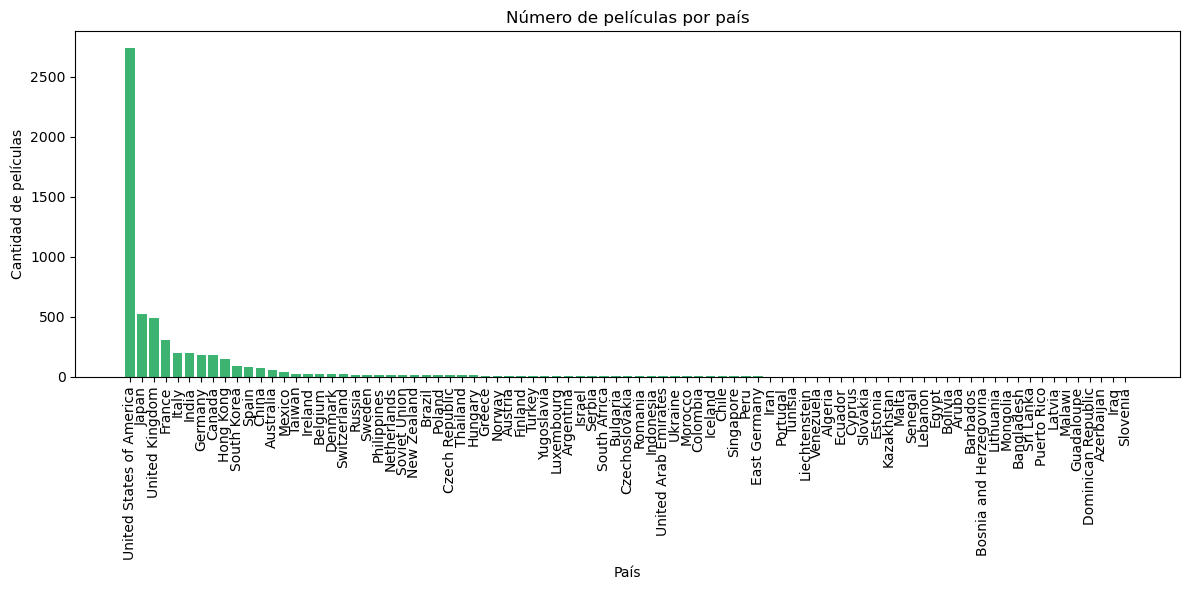

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

all_countries = []
for entry in df["production_countries"].dropna():
    all_countries.extend([pais.strip() for pais in entry])

country_counts = Counter(all_countries)

df_countries = pd.DataFrame(country_counts.items(), columns=["País", "Películas"])
df_countries = df_countries.sort_values("Películas", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_countries["País"], df_countries["Películas"], color="mediumseagreen")
plt.xticks(rotation=90)
plt.title("Número de películas por país")
plt.ylabel("Cantidad de películas")
plt.xlabel("País")
plt.tight_layout()
plt.show()

In [12]:
df_countries.head(15)

,País,Películas
0,United States of America,2743
7,Japan,523
5,United Kingdom,491
12,France,308
35,Italy,201
8,India,200
21,Germany,185
3,Canada,183
20,Hong Kong,153
2,South Korea,94


In [14]:
# Solución a los valores nulos

df.isnull().mean().sort_values(ascending=False)

tagline                 0.655778
overview                0.212444
main_country            0.015556
genres                  0.005778
director                0.003333
production_countries    0.000000
original_title          0.000000
release_date            0.000000
original_language       0.000000
title                   0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
keywords                0.000000
id                      0.000000
dtype: float64

In [16]:
null_percent = df.isnull().mean().sort_values(ascending=False)*100
null_percent[null_percent > 0].round(2)

tagline         65.58
overview        21.24
main_country     1.56
genres           0.58
director         0.33
dtype: float64

In [41]:
# Tagline tiene un porcentaje muy alto de nulos. Es mejor prescindir de esta columna.
# Overview es importante, rellenaremos los huecos.
# Main_country y director tienen muy bajo porcentaje nulo, también lo rellenaremos.
# Con Genres hay que asegurarse de que todos los valores sean listas válidas. 

In [18]:
# Tagline
df.drop(columns=["tagline"], inplace=True)

df.isnull().mean().sort_values(ascending=False)


overview                0.212444
main_country            0.015556
genres                  0.005778
director                0.003333
id                      0.000000
title                   0.000000
original_title          0.000000
production_countries    0.000000
release_date            0.000000
original_language       0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
keywords                0.000000
dtype: float64

In [20]:
# Overview

df["overview"] = df["overview"].fillna("Sin descripción disponible.")

df.isnull().mean().sort_values(ascending=False)

main_country            0.015556
genres                  0.005778
director                0.003333
id                      0.000000
title                   0.000000
original_title          0.000000
production_countries    0.000000
overview                0.000000
release_date            0.000000
original_language       0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
keywords                0.000000
dtype: float64

In [22]:
# main_country

df["main_country"] = df["main_country"].fillna("Unknown")

df.isnull().mean().sort_values(ascending=False)

genres                  0.005778
director                0.003333
id                      0.000000
title                   0.000000
original_title          0.000000
production_countries    0.000000
overview                0.000000
release_date            0.000000
original_language       0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
keywords                0.000000
main_country            0.000000
dtype: float64

In [24]:
# director

df["director"] = df["director"].fillna("Unknown")

df.isnull().mean().sort_values(ascending=False)

genres                  0.005778
id                      0.000000
title                   0.000000
original_title          0.000000
production_countries    0.000000
overview                0.000000
release_date            0.000000
original_language       0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
director                0.000000
keywords                0.000000
main_country            0.000000
dtype: float64

In [26]:
# genres

df["genres"].iloc[0]

df["genres"] = df["genres"].apply(lambda x: [g.strip() for g in x.split(",")] if isinstance(x, str) else [])

In [28]:
df["genres"].iloc[0]

['Terror', 'Comedia']

In [32]:
# Guardamos progreso
import os
os.makedirs("data", exist_ok=True)
df.to_csv("data/movies_paso1_limpieza.csv", index=False)

In [34]:
# Normalización de los nombres de director

directores = df['director'].value_counts(dropna=False)
print(directores,"\n")

directores_unicos = set()

for entry in df["director"].dropna():
    for director in entry.split(","):
        directores_unicos.add(director.strip())

print(sorted(directores_unicos))

director
Unknown            15
Tim Burton         13
Sidney Lumet       11
Woody Allen        10
Chang Cheh          9
                   ..
Jeffrey W. Byrd     1
Boyapati Srinu      1
Peter Gilstrap      1
David Kendall       1
Peter Cattaneo      1
Name: count, Length: 3017, dtype: int64 

['Aamir Khan', 'Aaron Huggett', 'Aaron Lipstadt', 'Aaron Mirtes', 'Aaron Nee', 'Aaron Norris', 'Aashiq Abu', 'Abbas Alibhai Burmawalla', 'Abbas Kiarostami', 'Abel Ferrara', 'Abel Gance', 'Abhishek Pathak', 'Abhishek Varman', 'Abraham Polonsky', 'Adam B. Stein', 'Adam Elliot', 'Adam Randall', 'Adam Rehmeier', 'Adam Resnick', 'Adam Rifkin', 'Adam Robitel', 'Adam Shankman', 'Adam Simon', 'Adam Stern', 'Adam Wingard', 'Adil El Arbi', 'Aditya Dhar', 'Adolfo Martínez Solares', 'Adrian Grünberg', 'Adrian Lyne', 'Agathiyan', 'Agnes Ng', 'Agnieszka Holland', 'Agragami', 'Aishwarya Rajinikanth', 'Akihiko Shiota', 'Akinori Nagaoka', 'Akio Jissoji', 'Akira Kato', 'Akira Kurosawa', 'Akiva Schaffer', 'Al Adamson

In [36]:
correcciones_directores = {
    'Alan Mak Siu-Fai': 'Alan Mak',
    'Benny Chan Muk-Sing': 'Benny Chan',
    'Corey Yuen Kwai': 'Corey Yuen',
    'Jess Franco': 'Jesús Franco',
    'Joseph L. Mankiewicz': 'Joseph Mankiewicz'
}
df['director'] = df['director'].replace(correcciones_directores)
    

In [111]:
directores = df['director'].value_counts(dropna=False)
print(directores,"\n")

directores_unicos = set()

for entry in df["director"].dropna():
    for director in entry.split(","):
        directores_unicos.add(director.strip())

print(sorted(directores_unicos))

director
Gordon Douglas         7
Akira Kurosawa         4
Anthony Mann           4
John Sturges           3
Jesús Franco           3
                      ..
Chris Wedge            1
Andrew Niccol          1
Ang Lee                1
Darren Lynn Bousman    1
Zhang Yimou            1
Name: count, Length: 859, dtype: int64 

['Aaron Norris', 'Abbas Kiarostami', 'Abel Ferrara', 'Abraham Polonsky', 'Adam Elliot', 'Adam Rehmeier', 'Adam Shankman', 'Adam Simon', 'Adam Stern', 'Adam Wingard', 'Adil El Arbi', 'Adrian Lyne', 'Agnieszka Holland', 'Aki Kaurismäki', 'Akira Kurosawa', 'Alain Robbe-Grillet', 'Alan J. Pakula', 'Alan Le May', 'Alan Mak', 'Albert Pyun', 'Alberto Bevilacqua', 'Alejandro Jodorowsky', 'Alessandro Genovesi', 'Alex Garland', 'Alexander Hall', 'Alexandre de La Patellière', 'Alfred E. Green', 'Alfred Hitchcock', 'Allan Dwan', 'Allan Moyle', 'Allen Kool', 'Alvin Rakoff', 'Amy Heckerling', 'Andrew Adamson', 'Andrew Bergman', 'Andrew Douglas', 'Andrew Niccol', 'Andrew V. McLagle

In [38]:
# Guardamos el archivo 
df.to_csv("data/movies_limpios.csv", index=False)